In [2]:
# program ini bertujuan untuk mengklasifikasikan orang yang terkena penyakit jantung apa tidak terkena

import pymongo
import pandas as pd
from bson.json_util import dumps
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import sys
from sklearn.cluster import KMeans
from matplotlib import style
style.use("ggplot")

#bukti import dataset dari local storage
myclient = pymongo.MongoClient("mongodb://127.0.0.1:27017")
mydb = myclient["FinalProjectBDL"]
mycol = mydb["heart"]
query = mycol.find()
result_query = list(query)
df = pd.DataFrame(result_query)
print(df.head(10))

                        _id  age  sex  cp  trestbps  chol  fbs  restecg  \
0  60e3c3dd99c851b550c50e6b   41    0   1       130   204    0        0   
1  60e3c3dd99c851b550c50e6c   63    1   3       145   233    1        0   
2  60e3c3dd99c851b550c50e6d   37    1   2       130   250    0        1   
3  60e3c3dd99c851b550c50e6e   57    0   0       120   354    0        1   
4  60e3c3dd99c851b550c50e6f   44    1   1       120   263    0        1   
5  60e3c3dd99c851b550c50e70   56    0   1       140   294    0        0   
6  60e3c3dd99c851b550c50e71   52    1   2       172   199    1        1   
7  60e3c3dd99c851b550c50e72   54    1   0       140   239    0        1   
8  60e3c3dd99c851b550c50e73   48    0   2       130   275    0        1   
9  60e3c3dd99c851b550c50e74   49    1   1       130   266    0        1   

   thalach  exang  oldpeak  slope  ca  thal  target  
0      172      0      1.4      2   0     2       1  
1      150      0      2.3      0   0     1       1  
2      187  

In [3]:
#menyiapkan data dan memanggil dataset di session storage
dataset = pd.read_csv("heart.csv")
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
#menginformasikan kolom yang ada didalam dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [65]:
#cek data lagi apakah ada data yang kosong lagi apa tidak
dataset.isnull().values.any()

False

In [22]:
heart_disease_uci = dataset[["age","sex"]]
heart_disease_uci

,age,sex
0,63,1
1,37,1
2,41,0
3,56,1
4,57,0
...,...,...
298,57,0
299,45,1
300,68,1
301,57,1


In [9]:
dataset.shape

(303, 14)

In [23]:
heart_disease_uci.to_csv("heart_disease_uci_fpbdl.csv")

In [15]:
import pymongo
import pandas as pd
from bson.json_util import dumps
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import sys
from sklearn.cluster import KMeans
from matplotlib import style
import seaborn as sns

plt.style.use('ggplot')
dataset = pd.read_csv("heart_disease_uci_fpbdl.csv")
dataset.keys()

Index(['Unnamed: 0', 'age', 'sex'], dtype='object')

In [16]:
dataku = pd.DataFrame(dataset)
dataku.head()

,Unnamed: 0,age,sex
0,0,63,1
1,1,37,1
2,2,41,0
3,3,56,1
4,4,57,0


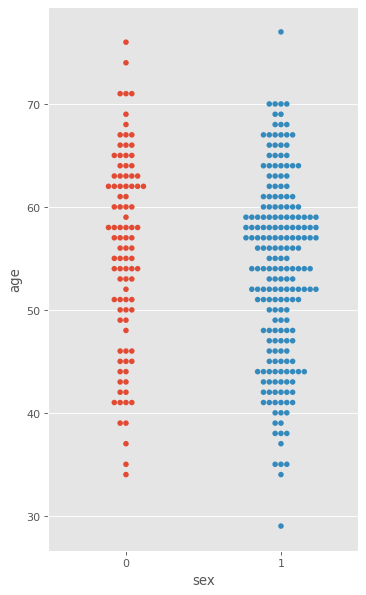

In [17]:
figure(figsize=(5,9), dpi=80)
sns.swarmplot(x='sex',y='age',data=dataku)
plt.show()

In [18]:
#konfersi ke array
x = np.asarray(dataku)
x

array([[  0,  63,   1],
       [  1,  37,   1],
       [  2,  41,   0],
       [  3,  56,   1],
       [  4,  57,   0],
       [  5,  57,   1],
       [  6,  56,   0],
       [  7,  44,   1],
       [  8,  52,   1],
       [  9,  57,   1],
       [ 10,  54,   1],
       [ 11,  48,   0],
       [ 12,  49,   1],
       [ 13,  64,   1],
       [ 14,  58,   0],
       [ 15,  50,   0],
       [ 16,  58,   0],
       [ 17,  66,   0],
       [ 18,  43,   1],
       [ 19,  69,   0],
       [ 20,  59,   1],
       [ 21,  44,   1],
       [ 22,  42,   1],
       [ 23,  61,   1],
       [ 24,  40,   1],
       [ 25,  71,   0],
       [ 26,  59,   1],
       [ 27,  51,   1],
       [ 28,  65,   0],
       [ 29,  53,   1],
       [ 30,  41,   0],
       [ 31,  65,   1],
       [ 32,  44,   1],
       [ 33,  54,   1],
       [ 34,  51,   1],
       [ 35,  46,   0],
       [ 36,  54,   0],
       [ 37,  54,   1],
       [ 38,  65,   0],
       [ 39,  65,   0],
       [ 40,  51,   0],
       [ 41,  48

AttributeError: 'numpy.ndarray' object has no attribute 'get'

<Figure size 400x720 with 0 Axes>

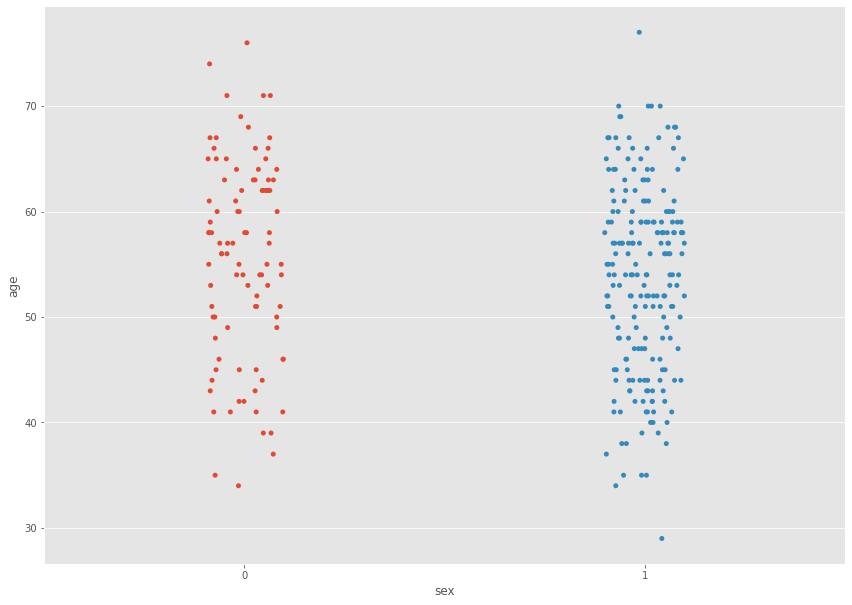

In [19]:
#menampilkan data dalam bentuk cat plot

sns.catplot(x='sex', y='age', data=dataku, height=8.27, aspect=11.7/8.27)
plt.show()

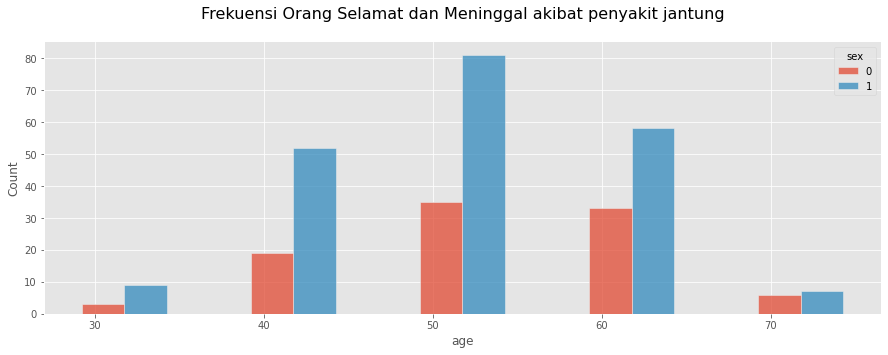

In [56]:
f, ax1 = plt.subplots(1, figsize=(15, 5), sharex=False)
sns.histplot(x=dataku['age'].astype(float),hue = "sex", multiple="dodge", data=dataku, shrink=.5, binwidth=10)
ax1.set_title('Frekuensi Orang Selamat dan Meninggal akibat penyakit jantung\n', size=16) 
sns.despine(bottom=True)
# 0 artinya wanita
# 1 artinta pria

In [21]:
# mengaktifkan K-Means dengan jumlah K = 2
KMeans = KMeans(n_clusters=2)
KMeans.fit(x)

KMeans(n_clusters=2)

In [22]:
#menampilkan nilai centroid yang digenerate algoritma kmeans
print(KMeans.cluster_centers_)

[[226.5         56.13815789   0.80921053]
 [ 75.          52.58278146   0.55629139]]


In [23]:
# menampilkan label data poin 
print(KMeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


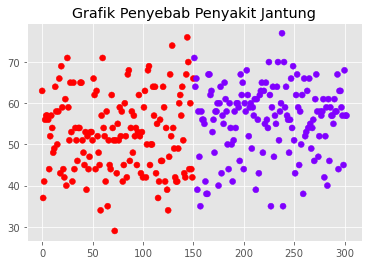

In [24]:
# menampilan data setelah dikluster dengan scatter plot

plt.scatter(x[:,0],x[:,1], c=KMeans.labels_,cmap='rainbow' )

plt.title("Grafik Penyebab Penyakit Jantung")

plt.show()

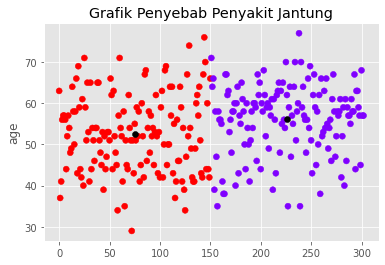

In [29]:
#menampilkan centroid dari kluster yang telah dibuat
plt.scatter(x[:,0],x[:,1], c=KMeans.labels_,cmap='rainbow' )
plt.scatter(KMeans.cluster_centers_[:,0],
           KMeans.cluster_centers_[:,1],
           color='black')
plt.ylabel("age")
plt.title("Grafik Penyebab Penyakit Jantung")
plt.show()

In [30]:
##DATASET YANG KEDUA FULL
#cetak dataset semua
dataset = pd.read_csv("heart.csv")
#dataset

#cetak dataset 7
dataset.head(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


In [31]:
#mencari jumlah data dan jumlah kolom
dataset.shape

(303, 14)

In [34]:
#menjumlahkan data yang kosong dalam kolom
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [35]:
#cek data lagi apakah ada data yang kosong lagi apa tidak
dataset.isnull().values.any()

False

In [36]:
#Menunjukkan rangkuman statistik seperti jumlah, rata-rata, median, dll pada kolom
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [37]:
#mendapatkan frekuensi yang terkena penyakit jantung apa tidaknya
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

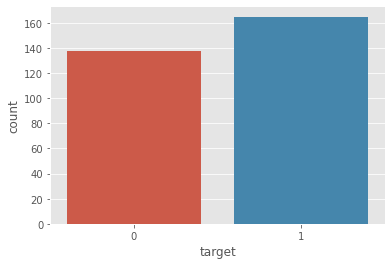

In [72]:
#memvisualkan frekuensi yang terkena penyakit jantung apa tidaknya
sns.countplot(x=dataset['target'])

<AxesSubplot:xlabel='age', ylabel='count'>

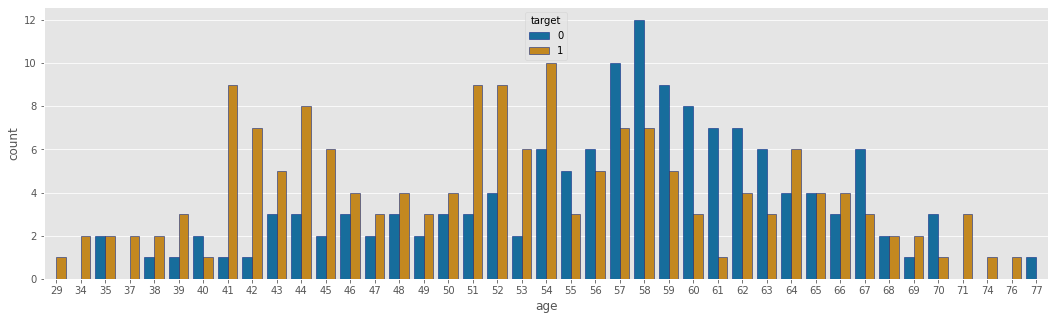

In [63]:
f, ax1 = plt.subplots(1, figsize=(18, 5), sharex=False)
sns.countplot(x='age',hue='target',data=dataset, palette='colorblind',edgecolor=sns.color_palette('dark',n_colors=1))

In [28]:
#melihat ketertarikan antara variabel 
#jika nilainya 0 s/d 1 menandakan bahwa variabel saling berbanding lurus,
#sedangkan nilainya -1 s/d 0 menunjukkan bahwa variabel saling berbanding terbalik
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

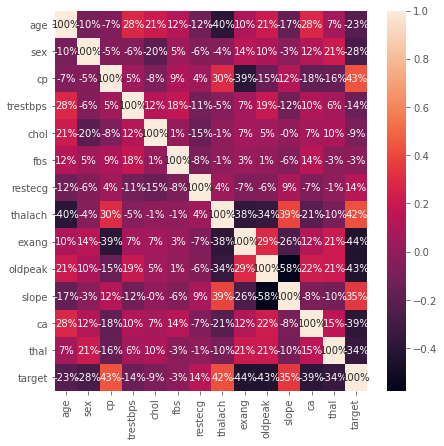

In [64]:
plt.figure(figsize=(7,7))
sns.heatmap(dataset.corr(), annot=True, fmt='.0%')